<a href="https://colab.research.google.com/github/lagnajit007/ImageProcessing/blob/main/KNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

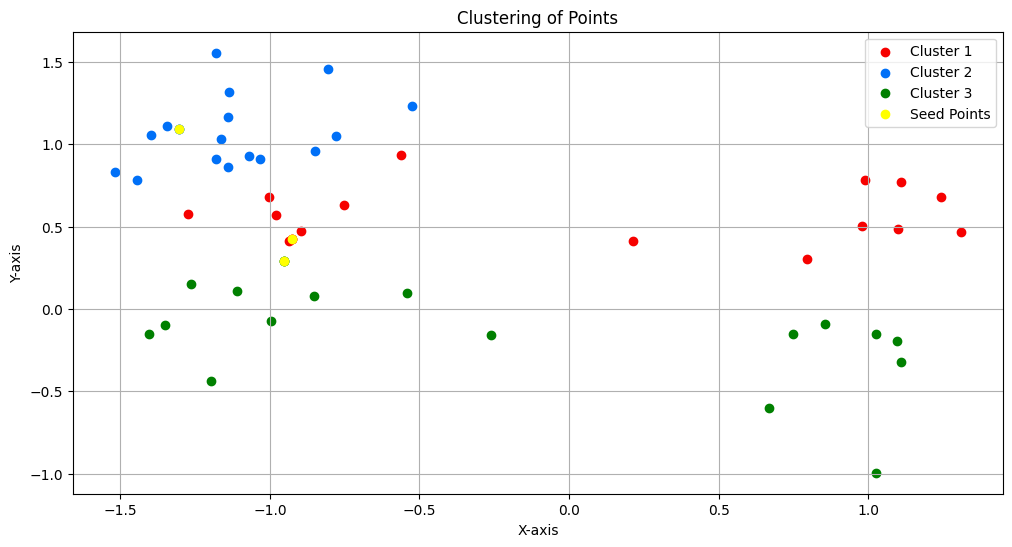

In [18]:
import numpy as np
from sklearn.neighbors import NearestNeighbors
import matplotlib.pyplot as plt

# Given points
pts = np.array([
    [-0.85098575, 0.95852071], [-0.80569344, 1.45690896], [-1.07024601, 0.92975891],
    [-0.52623616, 1.23023042], [-1.14084232, 1.16276801], [-1.13902531, 0.86028107],
    [-0.92741132, 0.42601593], [-1.51747535, 0.83131374], [-1.30384934, 1.0942742 ],
    [-1.27240722, 0.57630889], [-0.56030537, 0.93226711], [-0.97974154, 0.57257554],
    [-1.16331482, 1.03327678], [-1.34529807, 1.11270941], [-1.18019161, 0.91249188],
    [-1.18051198, 1.55568346], [-1.00404917, 0.68268672], [-0.75323653, 0.63374691],
    [-0.93734092, 0.41209896], [-1.39845581, 1.05905837], [-0.77846003, 1.05141048],
    [-1.03469448, 0.90966889], [-1.4435566, 0.78404674], [-1.13819163, 1.31713667],
    [-0.89691451, 0.47108795], [1.09722519, -0.19254114], [0.7969234, 0.30583814],
    [1.30929986, 0.46564006], [0.74823474, -0.15460619], [1.09937903, 0.48777256],
    [0.85624773, -0.09282949], [0.66809951, -0.59810331], [1.24375775, 0.67812001],
    [0.97839696, 0.50176645], [1.10849081, -0.32255988], [1.10841868, 0.76901828],
    [0.98925219, 0.78232183], [0.21407647, 0.41095125], [1.02611412, -0.14950368],
    [1.02752823, -0.99378446], [-1.10983594, 0.10713377], [-0.26105298, -0.15548107],
    [-1.4042468, -0.15052711], [-0.54229894, 0.09862533], [-1.2648801, 0.15398023],
    [-0.95146123, 0.2905935], [-1.35102655, -0.09829864], [-1.19605408, -0.43905448],
    [-0.85193986, 0.07831658], [-0.99744327, -0.07037614]
])


plt.figure(figsize=(12, 6))

# Density estimation using KNN with K=5
knn = NearestNeighbors(n_neighbors = 5)
knn.fit(pts)
distances, _ = knn.kneighbors(pts, 5)
density = 1 / (np.mean(distances, axis=1) + 1e-6)  # Adding a small value to avoid division by zero

# find seed points
sorted_indices = np.argsort(density)[::-1]  # Sort indices in decreasing order of density
threshold = 0.75
seed_points = []
for index in sorted_indices:
    if not seed_points or np.linalg.norm(pts[index] - seed_points[-1]) > threshold:
        seed_points.append(pts[index])
    if len(seed_points) == 3:
        break

# Form clusters using minimum distance clustering
clusters = {0: [seed_points[0]], 1: [seed_points[1]], 2: [seed_points[2]]}
for point in pts:
    distances_to_seeds = [np.linalg.norm(point - seed) for seed in seed_points]
    closest_seed = np.argmin(distances_to_seeds)
    clusters[closest_seed].append(point)

# Plotting different clusters in different colors
colors = ['#F60100', '#0070F7', 'green']
for i, (key, cluster) in enumerate(clusters.items()):
    cluster = np.array(cluster)
    plt.scatter(cluster[:, 0], cluster[:, 1], color=colors[i], label=f'Cluster {key + 1}')

plt.scatter(np.array(seed_points)[:, 0], np.array(seed_points)[:, 1], color='yellow', label='Seed Points')
plt.legend()
plt.title('Clustering of Points')
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.grid(True)
plt.show()
